In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import dateutil.parser
import matplotlib.pyplot as plt

In [42]:
# dictionary of text dates and links

# August 2, 2015
url1 = 'https://www.reuters.com/article/us-toyota-sales-idUSKCN0Q805F20150803'

# August 18, 2015
url2 = 'https://uk.reuters.com/article/uk-china-blast-toyota/global-automakers-divert-shipments-from-chinas-tianjin-port-after-blasts-idUKKCN0QO07W20150819'

# September 3, 2015
url3 = 'https://www.reuters.com/article/us-volkswagen-chairman-poetsch/vws-finance-chief-set-to-become-new-chairman-idUSKCN0R31B620150903'

# September 4, 2-15
url4 = 'https://www.reuters.com/article/us-toyota-research-robotics-idUSKCN0R41X220150904'

# September 18, 2015
url5 = 'https://www.reuters.com/article/us-usa-volkswagen-idUSKCN0RI1VK20150918'

# September 21, 2015
url6 = 'https://www.reuters.com/article/us-usa-volkswagen-emission-idUSKCN0RL2EI20150922'

# September 24, 2015
url7 = 'https://www.reuters.com/article/usa-volkswagen-deception-idUSL1N11U1OB20150924'

# September 29, 2015
url8 = 'https://www.reuters.com/article/volkswagen-emissions-technology-idUSL1N11Z1XQ20150929'


# October 8, 2015
url9 = 'https://www.reuters.com/article/us-volkswagen-emissions-consumers-insigh-idUSKCN0S20CK20151008'

# October 13, 2015
url10 = 'https://in.reuters.com/article/us-volkswagen-emissions-investment/vw-looks-to-cutbacks-and-electric-cars-to-overcome-scandal-idUKKCN0S710020151013'

# October 21, 2015
url11 = 'https://ca.reuters.com/article/businessNews/idCAKCN0SF1FU20151021'

# October 22, 2015
url12 = 'https://www.reuters.com/article/us-volkswagen-emissions-brazil-idUSKCN0SG1N720151022'


# October 28, 2015
url13 = 'https://www.reuters.com/article/us-volkswagen-emissions-dealers-idUSKCN0SM2SG20151028'

# November 4, 2015
url14 = 'https://www.reuters.com/article/us-volkswagen-emissions-idUSKCN0ST1VY20151104'

# November 8, 2015
url15 = 'https://www.reuters.com/article/volkswagen-emissions/vw-engineers-have-admitted-manipulating-co2-emissions-data-paper-idUKL8N1320KD20151108'

url_dict = {'08/02/2015':url1,
            '08/18/2015':url2,
            '09/03/2015':url3,
            '09/04/2015':url4,
            '09/18/2015':url5,
           '09/21/2015':url6,
           '09/24/2015':url7,
            '09/29/2015':url8,
            '10/08/2015':url9,
            '10/13/2015':url10,
            '10/21/2015':url11,
           '10/22/2015':url12,
           '10/28/2015':url13,
            '11/04/2015':url14,
           '11/08/2015':url15,
           }


In [43]:
# extract info from each website and store it in dataframe
df_text = pd.DataFrame(columns = ['Date','Header','Text'])
header = []
text = []
date = []
for key in url_dict:
    page = requests.get(url_dict[key]).text
    soup = BeautifulSoup(page, 'html.parser')
    date.append(datetime.strptime(key, '%m/%d/%Y').date())
    url_header = soup.find('h1').text
    header.append(url_header)
    url_text = soup.find('div', class_ = 'ArticleBodyWrapper').text
    text.append(url_text)
df_text['Date']=date
df_text['Header']=header
df_text['Text']=text

# remove the author and "min read" sections
df_text_temp = [] 
for text in df_text['Text']:
    loc = text.find('(Reuters)')
    df_text_temp.append(text[loc+9:])
df_text['Text'] = df_text_temp




In [44]:
df_text

,Date,Header,Text
0,2015-08-02,Volkswagen overtakes Toyota as world's biggest...,- Volkswagen VOWG_p.DE overtook Toyota 7203.T...
1,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...
2,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...
3,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...
4,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...
5,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...
6,2015-09-24,"INSIGHT-After year of stonewalling, VW stunned...",- The confession of cheating that’s embroiled...
7,2015-09-29,Illegal VW diesel emission systems may require...,- Volkswagen AG ‘s promise to fix pollution c...
8,2015-10-08,VW's U.S. recall could be thwarted by reluctan...,- As Volkswagen AG prepares to explain how it...
9,2015-10-13,VW looks to cutbacks and electric cars to over...,- Volkswagen will cut investment plans at its...


In [45]:
# import stock data of netflix
df_stock = pd.read_csv('Volkswagen.csv', header=0)
df_stock['Date']=df_stock['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').date())

df_stock = df_stock[df_stock[' Volume'] != ' N/A']

# Remove $ sign and change to int variable
df_stock[' Open'] = df_stock[' Open'].apply(lambda x : x[1:])
df_stock[' High'] = df_stock[' High'].apply(lambda x : x[1:])
df_stock[' Low'] = df_stock[' Low'].apply(lambda x : x[1:])
df_stock[' Close/Last'] = df_stock[' Close/Last'].apply(lambda x : x[1:])

# Remove $ sign and change to int variable
df_stock[' Open'] = df_stock[' Open'].astype(float)
df_stock[' High'] = df_stock[' High'].astype(float)
df_stock[' Volume'] = df_stock[' Volume'].astype(float)
df_stock[' Low'] = df_stock[' Low'].astype(float)
df_stock[' Close/Last'] = df_stock[' Close/Last'].astype(float)

columns_remove = [' High', ' Low', ' Close/Last']
df_stock = df_stock.drop(columns_remove, axis=1)



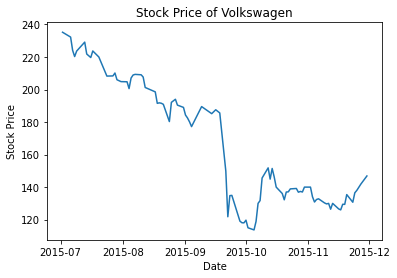

In [46]:
df_plot = df_stock[(df_stock['Date']>pd.to_datetime('07/01/2015')) & (df_stock['Date']<pd.to_datetime('12/01/2015'))]
plt.figure()
plt.plot(df_plot['Date'], df_plot[' Open'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price of Volkswagen')
plt.show()

In [47]:
# Merge two dataframes
df = pd.merge(df_text, df_stock, how='inner', on='Date')
df = df.sort_values('Date')

In [48]:
# show % change in stock price after news article publish
pct_stock = df[' Open'].pct_change()*100
df['% Change in Stock Price'] = pct_stock
pct_volume = df[' Volume'].pct_change()*100
df['% Change in Volume'] = pct_volume
df.head()

,Date,Header,Text,Volume,Open,% Change in Stock Price,% Change in Volume
0,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...,351.0,191.50,NaN,NaN
1,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...,295.0,180.10,-5.953003,-15.954416
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...,51.0,177.20,-1.610217,-82.711864
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...,209.0,185.60,4.740406,309.803922
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...,20900.0,149.88,-19.245690,9900.000000


# Processing the text


## import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [49]:
# import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [50]:

text_nlp = nlp(df['Text'][1]) 
# Remove stop words
text_nlp_clean = [word for word in text_nlp if word.is_stop == False]
# Lemmatize words
text_nlp_clean = [word.lemma_ for word in text_nlp_clean]

In [51]:
text_clean = []
for ind, row in df.iterrows():
    
    # lower casing
    text_lower = row['Text'].lower()
    
    # tokenization
    text_nlp = nlp(row['Text']) 
    
    # remove punctuation and empty space
    text_nlp_clean = [word for word in text_nlp if not word.is_punct | word.is_space]
    
    # Remove stop words
    text_nlp_clean = [word for word in text_nlp_clean if word.is_stop == False]
    
    # Lemmatize tokens
    text_nlp_clean = [word.lemma_ for word in text_nlp_clean]
    
    # add preprocessed text to list
    text_clean.append(text_nlp_clean)

# turn list of strings to string
to_string = []
for text in text_clean:
    to_string.append(' '.join(text))


df['Text (clean)'] = to_string
df.head()

,Date,Header,Text,Volume,Open,% Change in Stock Price,% Change in Volume,Text (clean)
0,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...,351.0,191.50,NaN,NaN,Toyota Motor Corp 7203.T rival global automake...
1,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...,295.0,180.10,-5.953003,-15.954416,Volkswagen VOWG_p de finance chief Hans Dieter...
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...,51.0,177.20,-1.610217,-82.711864,Toyota Motor Corp collaborate U.S. university ...
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...,209.0,185.60,4.740406,309.803922,Volkswagen AG VOWG_p DE face penalty $ 18 bill...
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...,20900.0,149.88,-19.245690,9900.000000,International Council Clean Transportation ICC...



# Using a Pretrained Model 

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [53]:
# a function to return sentiment score
def polarity_score(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

vader_score = []
for text in df['Text (clean)']:
    score = polarity_score(text)
    vader_score.append(score)

df['Vader Sentiment Score'] = vader_score

In [54]:
df.head()

,Date,Header,Text,Volume,Open,% Change in Stock Price,% Change in Volume,Text (clean),Vader Sentiment Score
0,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...,351.0,191.50,NaN,NaN,Toyota Motor Corp 7203.T rival global automake...,-0.9571
1,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...,295.0,180.10,-5.953003,-15.954416,Volkswagen VOWG_p de finance chief Hans Dieter...,0.9864
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...,51.0,177.20,-1.610217,-82.711864,Toyota Motor Corp collaborate U.S. university ...,0.9917
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...,209.0,185.60,4.740406,309.803922,Volkswagen AG VOWG_p DE face penalty $ 18 bill...,0.8720
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...,20900.0,149.88,-19.245690,9900.000000,International Council Clean Transportation ICC...,0.8024


## Sentiment Analysis

In [55]:
# run this cell to import nltk
import nltk
from os import getcwd
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 
from utils import process_tweet, build_freqs

In [56]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [58]:
# split the data into two pieces (80-20), one for training and one for testing (validation set)  
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [59]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [60]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [61]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11340


In [62]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        
        x[0,1] += freqs.get((word,1),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [63]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

In [64]:
Y.shape

(8000, 1)

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline

### SVM Parameters

In [66]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}  

In [67]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [68]:

# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [69]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet_prob(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict_proba(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [70]:

my_tweet = 'The plot was terrible and I was sad until the ending!'
predict_tweet(my_tweet, freqs)

array([0.])

# Testing the Model 

In [71]:
sentiment = []
sentiment_prob = []
for i in df.iloc[:,2]:
    sentiment.append(predict_tweet(i, freqs)[0])
    sentiment_prob.append(predict_tweet_prob(i, freqs)[0][1])

In [72]:
sentiment


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [73]:
sentiment_prob

[0.11011737395528699,
 0.32362056802365324,
 0.17058625468535882,
 0.011389621884586525,
 2.0200050075790174e-05,
 5.936869659795721e-10,
 0.0008369896929365236,
 2.1012563156613959e-07,
 8.371320562209231e-05,
 0.10619206900869374,
 0.3691674765745842,
 0.001845132376430351,
 3.1217756180908695e-06]

In [75]:
df.head()

,Date,Header,Text,Volume,Open,% Change in Stock Price,% Change in Volume,Text (clean),Vader Sentiment Score,Linear Regression Sentiment,sentiment_prob
0,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...,351.0,191.50,NaN,NaN,Toyota Motor Corp 7203.T rival global automake...,-0.9571,0.0,0.110117
1,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...,295.0,180.10,-5.953003,-15.954416,Volkswagen VOWG_p de finance chief Hans Dieter...,0.9864,0.0,0.323621
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...,51.0,177.20,-1.610217,-82.711864,Toyota Motor Corp collaborate U.S. university ...,0.9917,0.0,0.170586
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...,209.0,185.60,4.740406,309.803922,Volkswagen AG VOWG_p DE face penalty $ 18 bill...,0.8720,0.0,0.011390
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...,20900.0,149.88,-19.245690,9900.000000,International Council Clean Transportation ICC...,0.8024,0.0,0.000020


In [81]:

df['Logistic Regression Sentiment'] = sentiment
df['sentiment_prob'] = sentiment_prob
columns = ['Date', 'Header', 'Text (clean)', '% Change in Stock Price', 'Vader Sentiment Score', 'Logistic Regression Sentiment']
df[columns].head()

,Date,Header,Text (clean),% Change in Stock Price,Vader Sentiment Score,Logistic Regression Sentiment
0,2015-08-18,Global automakers divert shipments from China'...,Toyota Motor Corp 7203.T rival global automake...,NaN,-0.9571,0.0
1,2015-09-03,VW's finance chief set to become new chairman,Volkswagen VOWG_p de finance chief Hans Dieter...,-5.953003,0.9864,0.0
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",Toyota Motor Corp collaborate U.S. university ...,-1.610217,0.9917,0.0
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,Volkswagen AG VOWG_p DE face penalty $ 18 bill...,4.740406,0.8720,0.0
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,International Council Clean Transportation ICC...,-19.245690,0.8024,0.0
